Import

In [1]:
import sys
print(sys.executable)

c:\Users\Sergio\anaconda3\envs\python\python.exe


In [2]:
import torch
import seaborn as sns
from ultralytics import YOLO
import cv2
from sort.sort import *
import pandas as pd
import matplotlib.pyplot as plt
import math
from torchvision.utils import draw_bounding_boxes
import torchvision
from classify_by_movement import *
import pandas as pd
from calculate_features import *
import os

In [3]:
# Show graph inline
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

Load model for object detection

In [4]:
# Load the YOLOv5 model from the checkpoint
model = torch.hub.load('ultralytics/yolov5', 'custom', path='best_yolov5x.pt')

Using cache found in /home/saguilera/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-3-15 Python-3.11.7 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 444 layers, 86186872 parameters, 0 gradients, 203.8 GFLOPs
Adding AutoShape... 


## Show results of video

In [5]:
fps = 50  # Video's frame rate

#video_path = 'data/data_orig/val/'+video_number+'/'+video_number+'.mp4'
video_train_path = 'data/VISEM_Tracking/train/'

In [7]:
# List all files and directories in the specified path
contents = os.listdir(video_train_path)
print(contents)

['11', '12', '13', '14', '15', '19', '21', '22', '23', '24', '29', '30', '35', '36', '38', '47', '52', '54', '60', '82']


##### Object detection

In [8]:
tracker = Sort() 
tracking_data = []
trajectories = {}

for video_index in contents:
    video_path = 'data/VISEM_Tracking/train/' + video_index + '/' + video_index + '.mp4'
    print(video_path)
    cap = cv2.VideoCapture(video_path)
    frame_id = 0
    # Process the video frame by frame
    while cap.isOpened():
        print("Frame_id:", frame_id)
        ret, frame = cap.read()
        if not ret:
            break

        # Run inference on the frame
        results = model(frame)
        
        # Extract bounding box information
        bbox_data = results.pandas().xyxy[0]
        detections = bbox_data[['xmin', 'ymin', 'xmax', 'ymax', 'confidence']].values
        labels = results.pandas().xyxy[0]['class'].values

        # Update the tracker with the detected bounding boxes
        tracks = tracker.update(detections)
        
        '''
        # Draw bounding boxes and track IDs on the frame
        for track in tracks:
            xmin, ymin, xmax, ymax, track_id = track
            xmin, ymin, xmax, ymax, track_id = map(int, [xmin, ymin, xmax, ymax, track_id])

            # Draw bounding box
            cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

            # Draw track ID
            cv2.putText(frame, f"ID: {track_id}", (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        
        '''

        # Inside the frame processing loop:
        for idx,track in enumerate(tracks):
            xmin, ymin, xmax, ymax, track_id = track
            cx, cy = (xmin + xmax) / 2, (ymin + ymax) / 2  # Centroid
            tracking_data.append([frame_id, video_index, track_id, labels[idx], cx, cy, xmin, ymin, xmax, ymax])
            
            if track_id not in trajectories:
                trajectories[track_id] = []
            trajectories[track_id].append((cx, cy))
            '''
            # Draw path
            for i in range(1, len(trajectories[track_id])):
                cv2.line(frame, (int(trajectories[track_id][i - 1][0]),int(trajectories[track_id][i - 1][1])), (int(trajectories[track_id][i][0]),int(trajectories[track_id][i][1])), (0, 255, 0), 2)
            '''
            
        # Render the results on the frame
        #rendered_frame = results.render()[0]
        # Display the frame
        #cv2.imshow('YOLOv5 Inference: video ' + video_index, frame)

        # Wait for a key press (25ms delay between frames)
        # Press 'q' to exit the sequence
        '''
        if cv2.waitKey(25) & 0xFF == ord('q') or frame_id == 250:
            break
        '''
        frame_id += 1

    # Release the video capture object and close windows
    cap.release()
    cv2.destroyAllWindows()

# Save tracking data to a CSV file
df = pd.DataFrame(tracking_data, columns=['frame_id', 'video_id', 'track_id', 'class', 'cx', 'cy', 'xmin', 'ymin', 'xmax', 'ymax'])
print(df)
df.to_csv('results/data_sperm_tracking/sperm_tracking_data.csv', index=False)

data/VISEM_Tracking/train/11/11.mp4
Frame_id: 0


/home/saguilera/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame_id: 1


/home/saguilera/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame_id: 2


/home/saguilera/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame_id: 3


/home/saguilera/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame_id: 4


/home/saguilera/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame_id: 5


/home/saguilera/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame_id: 6


/home/saguilera/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame_id: 7


/home/saguilera/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame_id: 8


/home/saguilera/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame_id: 9


/home/saguilera/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame_id: 10


/home/saguilera/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame_id: 11


/home/saguilera/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame_id: 12


/home/saguilera/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame_id: 13


/home/saguilera/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame_id: 14


/home/saguilera/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame_id: 15


/home/saguilera/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame_id: 16


/home/saguilera/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame_id: 17


/home/saguilera/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


KeyboardInterrupt: 

## Calculate centroid and velocity

In [7]:
# Load the tracking data from a CSV file
df = pd.read_csv('results/data_sperm_tracking/sperm_tracking_data.csv')

# Calculate velocity for each track_id
df['velocity_x'] = 0.0
df['velocity_y'] = 0.0
df['speed'] = 0.0

# Frame rate of the video (frames per second)
dt = 1 / fps  # Time interval between frames

# Group by track_id and calculate velocity
for track_id, group in df.groupby('track_id'):
    # Calculate displacement (delta x and delta y)
    group['delta_x'] = group['cx'].diff()
    group['delta_y'] = group['cy'].diff()

    # Calculate velocity (pixels per second)
    group['velocity_x'] = group['delta_x'] / dt
    group['velocity_y'] = group['delta_y'] / dt

    # Calculate speed (magnitude of velocity)
    group['speed'] = (group['velocity_x']**2 + group['velocity_y']**2)**0.5
    
    
    # Calculate mean and maximum velocity
    group["mean_velocity"] = group['speed'].mean()
    group["max_velocity"] = group['speed'].max()
    
    df.loc[group.index, ['mean_velocity', 'max_velocity']] = group[['mean_velocity', 'max_velocity']].fillna(0)
    
    # Update the original DataFrame
    df.loc[group.index, ['velocity_x', 'velocity_y', 'speed']] = group[['velocity_x', 'velocity_y', 'speed']].fillna(0)

# Save the updated DataFrame with velocity data
df.to_csv('results/data_sperm_track_and_velocity/sperm_tracking_with_velocity.csv', index=False)

print("Velocity data saved to sperm_tracking_with_velocity.csv")

Velocity data saved to sperm_tracking_with_velocity.csv


## Calculate sperm characteristics and classify tracking in progressive or no progressive sperm

- Velocity: Average speed of the sperm (pixels/second).
- Straightness Ratio: Ratio of straight-line displacement to total path length.
- Angular Displacement: Change in direction over time (useful for detecting circular motion).
- Linearity: Measures how straight the trajectory is (e.g., using linear regression).
- Curvature: Measures how curved the trajectory is.
- Amplitude of Lateral Head Displacement (ALH): Side-to-side movement of the sperm head.
- Beat Cross Frequency (BCF): Frequency of the sperm head crossing its average path.
- Total Distance Traveled: Total path length of the sperm.
- Displacement: Straight-line distance from the start to the end point.
- Time Elapsed: Total time of the trajectory.

In [19]:
# Load the tracking data from a CSV file
df = pd.read_csv('results/data_sperm_track_and_velocity/sperm_tracking_with_velocity.csv')

# Frame rate of the video (frames per second)
dt = 1 / fps  # Time interval between frames
    
columns = ['sperm_id','Velocity','Straightness_Ratio','Angular_Displacement','Linearity','Curvature','ALH','BCF','Total_Distance','Displacement','Time_Elapsed','Label']
data = pd.DataFrame(columns=columns)

# Group by track_id and calculate velocity
for track_id, group in df.groupby('track_id'):
    # Convert the columns to a list of tuples
    trajectory_path = list(zip(group['cx'], group['cy']))

    # Features
    veolicity_mean = calculate_velocity(trajectory_path,fps)
    straightness = calculate_straightness(trajectory_path)
    angular_displacement = calculate_angular_displacement(trajectory_path)
    linearity = calculate_linearity(trajectory_path)
    curvature = calculate_curvature(trajectory_path)
    alh = calculate_alh(trajectory_path)
    bcf = calculate_bcf(trajectory_path,fps)
    total_distance = calculate_total_distance(trajectory_path)
    displacement = calculate_displacement(trajectory_path)
    time_elapsed = calculate_time_elapsed(trajectory_path,fps)
    label = is_progressive(trajectory_path, fps, velocity_threshold=10, straightness_threshold=0.8)

    new_row = pd.DataFrame([[track_id,veolicity_mean,straightness,angular_displacement,linearity,curvature,alh,bcf,total_distance,displacement,time_elapsed,label]], columns=data.columns)
    data = pd.concat([data,new_row], ignore_index=True)

# Save the DataFrame
data.to_csv('results/data_features_labeling/dataset.csv', index=False)

----
---

## EDA

In [20]:
# Load the tracking data from a CSV file
df = pd.read_csv('results/data_features_labeling/dataset.csv')
df.describe

<bound method NDFrame.describe of      sperm_id   Velocity  Straightness_Ratio  Angular_Displacement  Linearity  \
0       981.0   1.465538            0.029044             -0.000421   0.027792   
1       982.0   4.343355            0.355797              0.018359   0.970964   
2       983.0   1.429982            0.023760             -0.019582   0.001338   
3       984.0   2.699422            0.267798              0.005631   0.895376   
4       985.0   2.051169            0.002881              0.018809   0.037079   
..        ...        ...                 ...                   ...        ...   
963    2607.0  36.983287            0.299014             -2.554353   0.352087   
964    2608.0  12.347131            0.046806              0.001461   0.040773   
965    2609.0  36.806123            0.083883             -0.054293   0.109540   
966    2610.0   1.086957            0.000000                   NaN        NaN   
967    2611.0   0.000000            0.000000                   NaN        N

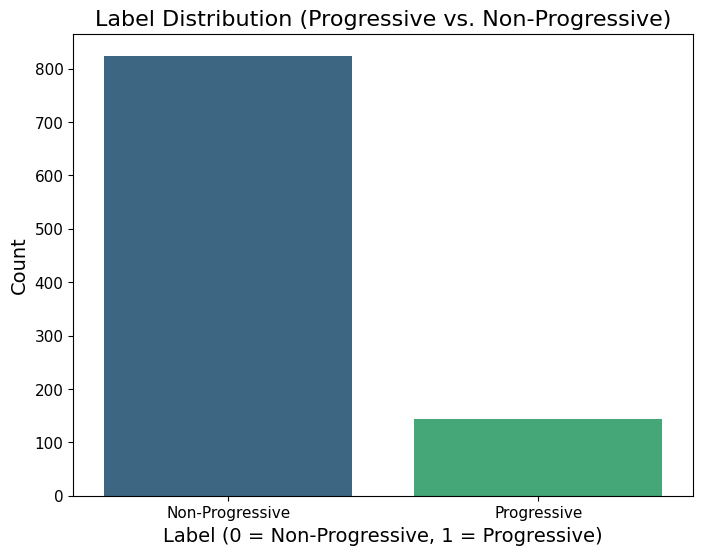

In [24]:
# Count the number of samples for each class
label_counts = df["Label"].value_counts()

# Plot the label distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, hue=label_counts.index, palette="viridis", legend=False)
plt.title("Label Distribution (Progressive vs. Non-Progressive)", fontsize=16)
plt.xlabel("Label (0 = Non-Progressive, 1 = Progressive)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], ["Non-Progressive", "Progressive"])  # Replace 0 and 1 with meaningful labels
plt.show()

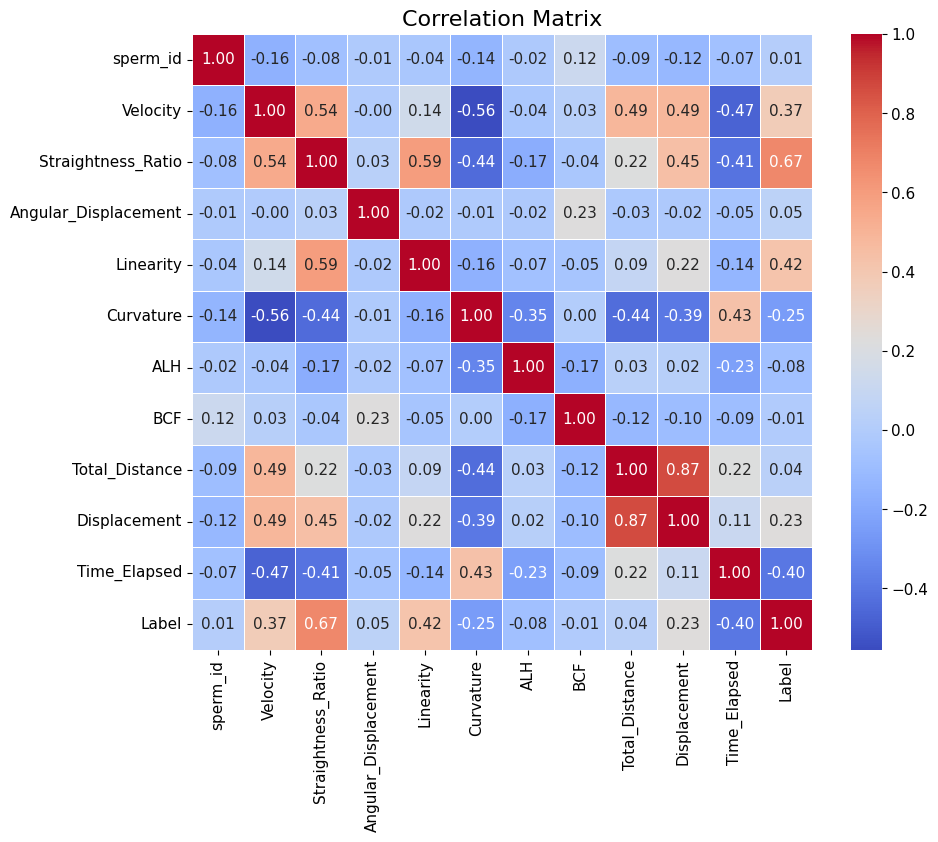

In [16]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

## Create model with data results

#### Random forest

Accuracy: 1.0


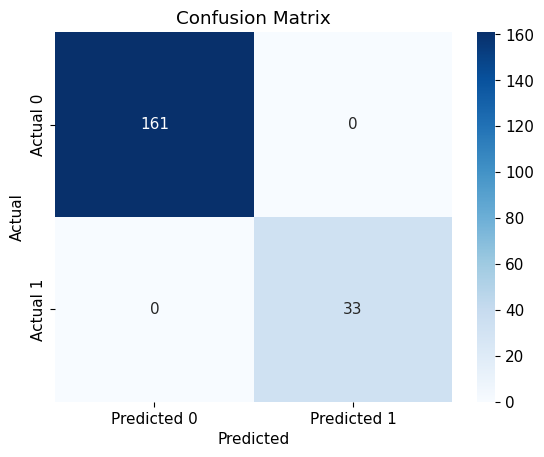

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Features and labels
X = df.drop(["Label","sperm_id"], axis=1).values
y = df["Label"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))



# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-progressive', 'Progressive'], 
            yticklabels=['Non-progressive', 'Progressive'])

# Add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

#### Deep learning model

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy, Precision, Recall

# Load the tracking data from a CSV file
df = pd.read_csv('results/data_features_labeling/dataset.csv')

# Features and labels
X = df.drop(["Label","sperm_id"], axis=1).values
y = df["Label"].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the deep learning model
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),  # Input layer
    Dropout(0.2),  # Dropout for regularization
    Dense(32, activation="relu"),  # Hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(16, activation="relu"),  # Hidden layer
    Dense(1, activation="sigmoid")  # Output layer (binary classification)
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
    metrics=[Accuracy(), Precision(), Recall()]
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

print(model)

# Evaluate the model on the test set
test_results = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_results[1]:.4f}")
print(f"Test Precision: {test_results[2]:.4f}")
print(f"Test Recall: {test_results[3]:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

Epoch 1/50
39/39 [==============================] - 1s 5ms/step - loss: 0.6373 - accuracy: 0.0000e+00 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.5642 - val_accuracy: 0.0000e+00 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/50
39/39 [==============================] - 0s 1ms/step - loss: 0.5151 - accuracy: 0.0000e+00 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.4259 - val_accuracy: 0.0000e+00 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 3/50
39/39 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.0000e+00 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.3808 - val_accuracy: 0.0000e+00 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 4/50
39/39 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.0000e+00 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.3759 - val_accuracy: 0.0000e+00 - val_precision_3: 0.0000e+00 - val_recal

## New unlabed video

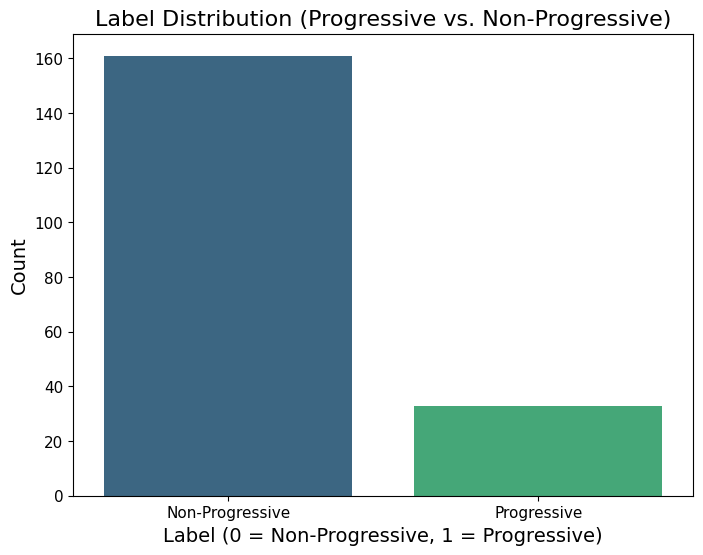

In [ ]:
# Import data from unlabed video
df = pd.read_csv('results/data_features_labeling/dataset13060.csv')

# Drop unused column
X = df.drop(["Label","sperm_id"], axis=1).values

# Predict with random forest model
y_pred = model.predict(X_test)

# Plot the label distribution
label_counts = pd.DataFrame(y_pred, columns=["labels"]).value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=["Non-Progressive", "Progressive"], y=label_counts.values, hue=["Non-Progressive", "Progressive"], palette="viridis", legend=False)
plt.title("Label Distribution (Progressive vs. Non-Progressive)", fontsize=16)
plt.xlabel("Label (0 = Non-Progressive, 1 = Progressive)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], ["Non-Progressive", "Progressive"])  # Replace 0 and 1 with meaningful labels
plt.show()